In [81]:
import pandas as pd
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
import matplotlib.pyplot as plt

In [133]:
#SAME AS DONE IN EXPLORATORY ANALYSIS
import pandas as pd
def load_dataset(csv):
  df = pd.read_csv(csv)
  return df
csv = 'Datasets/clustering_train_online_shoppers_intention.csv'
main_df = load_dataset(csv)
#del df['SpecialDay']
#del df['Month']
#del df['OperatingSystems']
#del df['Browser']
#del df['Region']
#del df['TrafficType']
#del df['Weekend']
#del df['PageValues']
main_df = main_df.query('VisitorType != 3')
main_df['VisitorType'] = main_df['VisitorType'].replace({1: 0, 2: 1})

#Feature Engineering 
#Converting Categorical into Integers and Use One-Hot Coding
avg_exit_rate = main_df['ExitRates'].mean()
avg_bounce_rate = main_df['BounceRates'].mean()
avg_admin_duration = main_df['Administrative_Duration'].mean()
avg_prod_duration = main_df['ProductRelated_Duration'].mean()
avg_info_duration = main_df['Informational_Duration'].mean()
avg_session_duration = main_df['SessionDuration'].mean()

main_df.head()

#sessions.to_csv('updated_online_shoppers_intention.csv', sep=',', index=False)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,SessionDuration,TotalPagesViewed
0,8,732.25,0,0.0,34,1345.755952,0.005128,0.013342,12.274195,0,5,3,3,3,2,1,0,0,2078.005952,42
1,0,0.00,0,0.0,4,157.200000,0.040000,0.100000,0.000000,0,10,1,8,3,1,1,1,0,157.200000,4
2,0,0.00,0,0.0,4,42.000000,0.000000,0.050000,0.000000,0,12,2,10,1,2,1,0,0,42.000000,4
3,2,338.00,0,0.0,17,1205.566667,0.012500,0.037500,19.236250,0,5,3,2,2,2,1,0,1,1543.566667,19
4,0,0.00,0,0.0,32,827.646212,0.000000,0.000587,54.676348,0,3,2,2,7,2,1,0,1,827.646212,32


In [ ]:
#Engaged Group 1
df['Engage_1'] = (
    (df['TotalPagesViewed'] > 2) & 
    (df['SessionDuration'] > 60) & 
    (df['BounceRates'] < 0.5)
).astype(int)

df.head()


C:\Users\Owner\AppData\Local\Temp\ipykernel_10404\1012526770.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_analysis = df.groupby('ExitRate_Bin')['Revenue'].mean().reset_index()


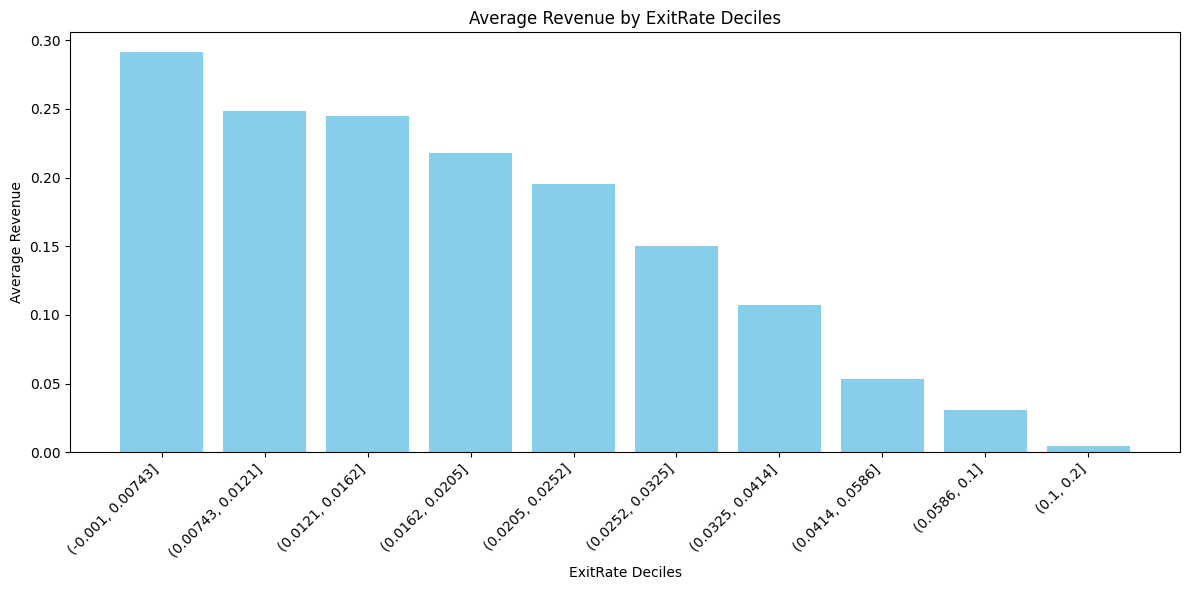

        ExitRate_Bin   Revenue
0  (-0.001, 0.00743]  0.291113
1  (0.00743, 0.0121]  0.248212
2   (0.0121, 0.0162]  0.245148
3   (0.0162, 0.0205]  0.217569
4   (0.0205, 0.0252]  0.195097
5   (0.0252, 0.0325]  0.150153
6   (0.0325, 0.0414]  0.107252
7   (0.0414, 0.0586]  0.053115
8      (0.0586, 0.1]  0.030899
9         (0.1, 0.2]  0.004494
Correlation: -0.21181332394084276


In [76]:
# Step 1: Create bins for ExitRates into 10 deciles
df['ExitRate_Bin'] = pd.qcut(df['ExitRates'], q=10, duplicates='drop')

# Step 2: Group by ExitRate bins and calculate average Revenue
bin_analysis = df.groupby('ExitRate_Bin')['Revenue'].mean().reset_index()

# Step 3: Visualize the relationship
plt.figure(figsize=(12, 6))
plt.bar(bin_analysis['ExitRate_Bin'].astype(str), bin_analysis['Revenue'], color='skyblue')
plt.title('Average Revenue by ExitRate Deciles')
plt.xlabel('ExitRate Deciles')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for clarity
plt.tight_layout()
plt.show()

# Optional: Print the grouped data
print(bin_analysis)
correlation = df['ExitRates'].corr(df['Revenue'])
print("Correlation:", correlation)


In [77]:
from scipy.stats import pearsonr

# Assuming 'ExitRates' and 'Revenue' are your columns
corr, p_value = pearsonr(df['ExitRates'], df['Revenue'])
print(f"Correlation: {corr}, P-value: {p_value}")


Correlation: -0.21181332394084215, P-value: 1.0396348797313394e-99


In [ ]:
import statsmodels.api as sm

# Define the variables
X = df['PageValues']
y = df['Revenue']
X = sm.add_constant(X)  # Add an intercept to the model

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             PageValues   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     3293.
Date:                Mon, 02 Dec 2024   Prob (F-statistic):               0.00
Time:                        00:14:02   Log-Likelihood:                -40950.
No. Observations:                9790   AIC:                         8.190e+04
Df Residuals:                    9788   BIC:                         8.192e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9504      0.174     11.186      0.0

In [ ]:
print(df[(df['ProductRelated_Duration']<1)&(df['ProductRelated_Duration']>0)].count())

In [ ]:
# Check if the customer visited all pages based on the given conditions
df['purchased_less_than_avg_er'] = (df['ExitRates'] < avg_exit_rate) & (df['Revenue'] == 1)
print(df['purchased_less_than_avg_er'].sum())
df.shape[0]


In [ ]:
threshold=0.25
max_customers=0
best_group_size=0
best_group_avg=0
avg_exit_rate = df['ExitRates'].mean()
avg_bounce_rate = df['BounceRates'].mean()
#Engaged group 2
for i in range(1,500):
    df['Engage_2'] = (df['ExitRates'] < avg_exit_rate)&(df['VisitorType']==0)&(df['ProductRelated']>i).astype(int)
    avg_engage_2 = df[(df['Engage_2'])&(df['Revenue']==1)].shape[0]/df[df['Engage_2']==1].shape[0]
    engage_2_count=df[df['Engage_2']==1].shape[0]
    print(f"engage metric{i}, % of 'Engage_2' with revenue: {avg_engage_2:.2%}, count: {engage_2_count}")
    if avg_engage_2 >= threshold:
        # Track the best configuration where the number of customers is large and revenue proportion meets the threshold
        if engage_2_count > max_customers:
            max_customers = engage_2_count
            best_group_size = engage_2_count
            best_group_avg = avg_engage_2
        print(f"Found a configuration with {engage_2_count} engaged customers and revenue proportion of {avg_engage_2:.2%}")
if max_customers > 0:
    print(f"Best configuration: {best_group_size} engaged customers with a revenue proportion of {best_group_avg:.2%}")
else:
    print("No configuration met the threshold for 'ProductRelated' > i")

        

In [112]:
# Create the Engage_2 column
df['Engage_2'] = (
    (df['ExitRates'] < avg_exit_rate) &
    (df['VisitorType'] == 0) &
    (df['ProductRelated'] > 1)
).astype(int)

# Debugging: Check the unique values in Engage_2
print("Unique values in 'Engage_2':", df['Engage_2'].unique())

# Calculate the count of engaged customers with revenue and total engaged customers
engage_2_with_revenue = df[(df['Engage_2'] == 1) & (df['Revenue'] == 1)].shape[0]
engage_2_total = df[df['Engage_2'] == 1].shape[0]

# Debugging: Print counts and ensure filters are applied correctly
print(f"Engage_2 with revenue: {engage_2_with_revenue}")
print(f"Total Engage_2 customers: {engage_2_total}")

# Avoid division by zero
if engage_2_total > 0:
    proportion_with_revenue = engage_2_with_revenue / engage_2_total
    print(f"Proportion of Engage_2 with Revenue: {proportion_with_revenue:.2%}")
else:
    print("No Engage_2 customers found.")

# Create a new DataFrame for Engage_2 customers
engage_2_df = df[df['Engage_2'] == 1]

# Debugging: Check the new DataFrame
print(engage_2_df.head())

# Export the new DataFrame to a CSV file without including the index
engage_2_df.to_csv('Engage_2_Customers.csv', index=False)


Unique values in 'Engage_2': [0 1]
Engage_2 with revenue: 324
Total Engage_2 customers: 1309
Proportion of Engage_2 with Revenue: 24.75%
    Administrative  Administrative_Duration  Informational  \
6                8                    103.0              0   
7                0                      0.0              0   
8                0                      0.0              0   
11               0                      0.0              1   
12               0                      0.0              0   

    Informational_Duration  ProductRelated  ProductRelated_Duration  \
6                      0.0              19              2081.500000   
7                      0.0               9               415.833333   
8                      0.0               6               317.500000   
11                    12.0              22              1668.950000   
12                     0.0               5               177.666667   

    BounceRates  ExitRates  PageValues  SpecialDay  ...  Browse

In [ ]:
threshold=0.25
max_customers=0
best_group_size=0
best_group_avg=0
#Engaged group 2
for i in range(1,50):
    df['High_Revenue'] = (df['TotalPagesViewed'] > 2)&(df['PageValues']>i).astype(int)
    avg_engage_2 = df[(df['Engage_2'])&(df['Revenue']==1)].shape[0]/df[df['Engage_2']==1].shape[0]
    engage_2_count=df[df['Engage_2']==1].shape[0]
    print(f"engage metric{i}, % of 'Engage_2' with revenue: {avg_engage_2:.2%}, count: {engage_2_count}")
    if avg_engage_2 >= threshold:
        # Track the best configuration where the number of customers is large and revenue proportion meets the threshold
        if engage_2_count > max_customers:
            max_customers = engage_2_count
            best_group_size = engage_2_count
            best_group_avg = avg_engage_2
        print(f"Found a configuration with {engage_2_count} engaged customers and revenue proportion of {avg_engage_2:.2%}")
if max_customers > 0:
    print(f"Best configuration: {best_group_size} engaged customers with a revenue proportion of {best_group_avg:.2%}")
else:
    print("No configuration met the threshold for 'ProductRelated' > i")

        

In [102]:
# Create the 'High_Revenue' column based on the condition
df['High_Revenue'] = (df['PageValues'] > 1).astype(int)

# Debugging: Check unique values in 'High_Revenue'
print("Unique values in 'High_Revenue':", df['High_Revenue'].unique())

# Calculate counts for engaged customers with revenue and total engaged customers
engage_2_with_revenue = df.query("High_Revenue == 1 and Revenue == 1").shape[0]
engage_2_total = df.query("High_Revenue == 1").shape[0]

# Calculate and print the proportion with revenue
if engage_2_total > 0:
    proportion_with_revenue = engage_2_with_revenue / engage_2_total
    print(f"Proportion of High_Revenue customers with Revenue: {proportion_with_revenue:.2%}")
else:
    print("No High_Revenue customers found.")

# Export filtered DataFrame without introducing an 'Unnamed' column
high_revenue_df = df[df['High_Revenue'] == 1]
high_revenue_df.to_csv('High_Revenue_Cluster.csv', index=False)

# Optional: Print summary of the exported DataFrame
print(f"Number of rows in 'High_Revenue_Cluster.csv': {high_revenue_df.shape[0]}")
print(high_revenue_df.head())


Unique values in 'High_Revenue': [1 0]
Proportion of High_Revenue customers with Revenue: 57.25%
Number of rows in 'High_Revenue_Cluster.csv': 2124
   Administrative  Administrative_Duration  Informational  \
0               8                   732.25              0   
3               2                   338.00              0   
4               0                     0.00              0   
5               5                   140.80              4   
6               8                   103.00              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    0.00              34              1345.755952   
3                    0.00              17              1205.566667   
4                    0.00              32               827.646212   
5                  254.75              61              1740.052778   
6                    0.00              19              2081.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Operatin

In [94]:
# Filter the DataFrame for rows where 'Engage_2' is True
engaged_df = df[df['Engage_2'] == True]

# Print the filtered DataFrame
print(engaged_df.head())

# Optional: Check the shape of the new DataFrame
print(f"Number of rows in engaged_df: {engaged_df.shape[0]}")
#engaged_df.to_csv('High_Engagement_Cluster.csv')


    Unnamed: 0  Administrative  Administrative_Duration  Informational  \
4            6               8               103.000000              0   
6           11               0                 0.000000              1   
9           19               8               204.107143              0   
11          23               9               576.620833              0   
18          80               9               381.866667              1   

    Informational_Duration  ProductRelated  ProductRelated_Duration  \
4                      0.0              19              2081.500000   
6                     12.0              22              1668.950000   
9                      0.0              15               347.732143   
11                     0.0              57              1878.195833   
18                    33.0              38              1190.616667   

    BounceRates  ExitRates  PageValues  VisitorType  Revenue  SessionDuration  \
4      0.000000   0.010000   24.547063         

In [120]:
csv = 'Datasets/Created Clusters/Low_Revenue_Cluster.csv'
df = pd.read_csv(csv)
print(df.columns)
#del df[]


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'VisitorType',
       'Weekend', 'Revenue', 'SessionDuration', 'TotalPagesViewed'],
      dtype='object')


Created Clusters

In [155]:
csv = 'Datasets/Created Clusters/High_Engagement_Cluster.csv'
df = pd.read_csv(csv)
del df['Engage_2']
del df['High_Revenue']
del df['Month']
del df['OperatingSystems']
del df['TrafficType']
del df['Browser']
del df['Region']

print(df.head())


   Administrative  Administrative_Duration  Informational  \
0               8                    103.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              1   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0              19              2081.500000   
1                     0.0               9               415.833333   
2                     0.0               6               317.500000   
3                    12.0              22              1668.950000   
4                     0.0               5               177.666667   

   BounceRates  ExitRates  PageValues  SpecialDay  VisitorType  Weekend  \
0          0.0   0.010000   24.547063           0            0        1   
1          0.0   0.012500    0.000000           0            0

In [90]:
csv = 'Datasets/Created Clusters/Low_Revenue_Cluster.csv'
df = pd.read_csv(csv)
print(df.head())

   Unnamed: 0  Administrative  Administrative_Duration  Informational  \
0           0               0                      0.0              0   
1           1               0                      0.0              0   
2           2               0                      0.0              0   
3           3               0                      0.0              0   
4           5               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              19               154.216667   

   BounceRates  ExitRates  PageValues  SpecialDay  VisitorType  Weekend  \
0     0.200000   0.200000         0.0         0.0            1   

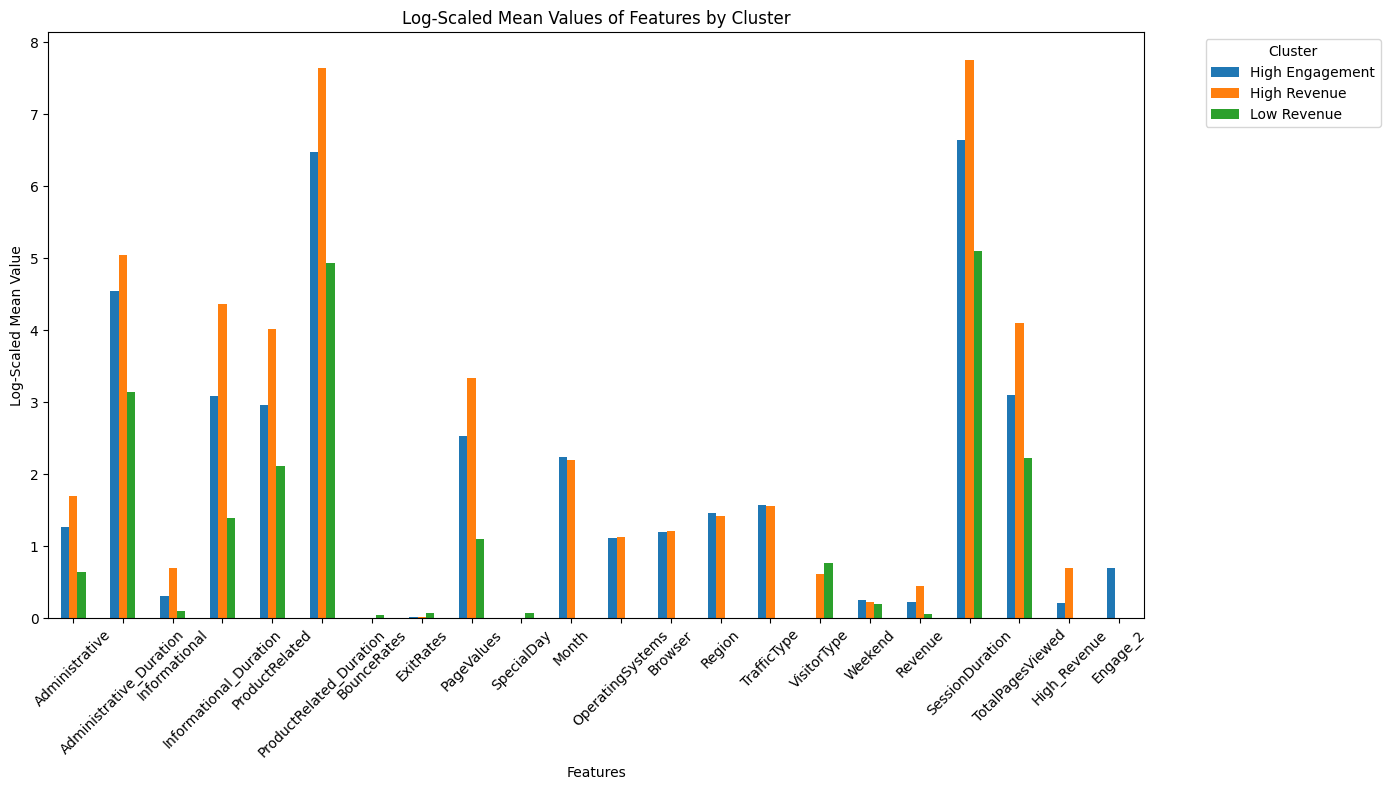

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
high_revenue_cluster = pd.read_csv('Datasets/Created Clusters/High_Revenue_Cluster.csv')
low_revenue_cluster = pd.read_csv('Datasets/Created Clusters/Low_Revenue_Cluster.csv')
high_engagement_cluster = pd.read_csv('Datasets/Created Clusters/High_Engagement_Cluster.csv')

# Add labels for clusters
high_revenue_cluster['Cluster'] = 'High Revenue'
low_revenue_cluster['Cluster'] = 'Low Revenue'
high_engagement_cluster['Cluster'] = 'High Engagement'

# Combine all clusters into one dataset
data = pd.concat([high_revenue_cluster, low_revenue_cluster, high_engagement_cluster], axis=0)

# Group data by 'Cluster'
grouped = data.groupby('Cluster')

# Calculate mean for each feature by cluster
cluster_means = grouped.mean()

# Apply logarithmic scale to means for better visualization
log_cluster_means = np.log1p(cluster_means)  # Add 1 to avoid log(0)

# Plot mean values (log-scaled) for each cluster
log_cluster_means.T.plot(kind='bar', figsize=(14, 8), title="Log-Scaled Mean Values of Features by Cluster")
plt.ylabel("Log-Scaled Mean Value")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


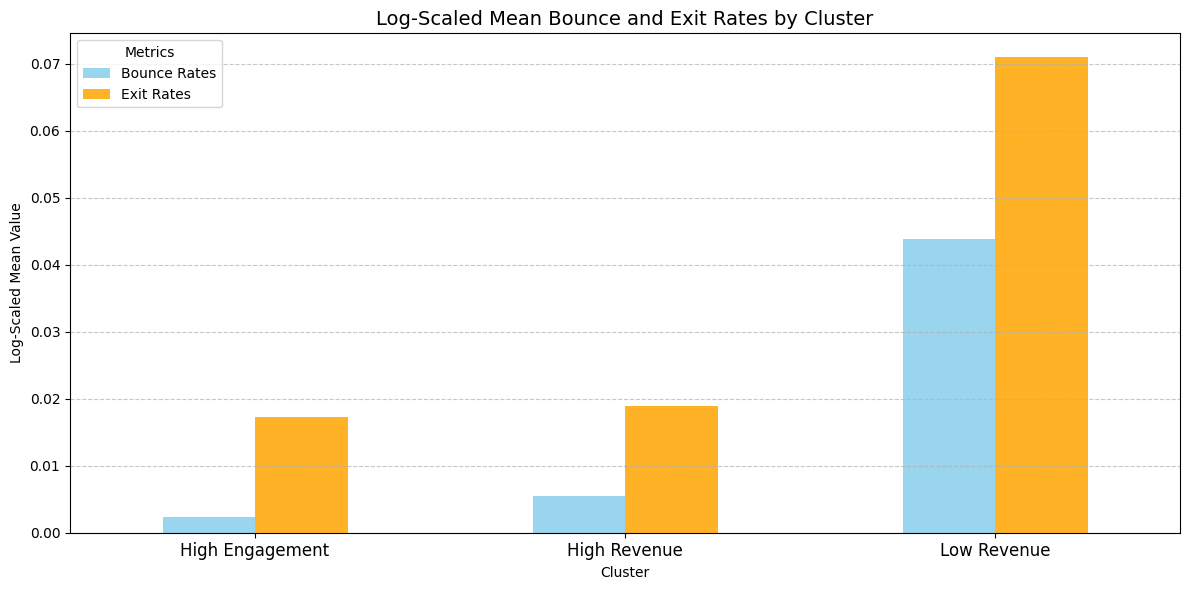

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
high_revenue_cluster = pd.read_csv('Datasets/Created Clusters/High_Revenue_Cluster.csv')
low_revenue_cluster = pd.read_csv('Datasets/Created Clusters/Low_Revenue_Cluster.csv')
high_engagement_cluster = pd.read_csv('Datasets/Created Clusters/High_Engagement_Cluster.csv')

# Drop unnecessary columns
del high_revenue_cluster['High_Revenue']
del high_engagement_cluster['Engage_2']
del high_engagement_cluster['High_Revenue']

# Add labels for clusters
high_revenue_cluster['Cluster'] = 'High Revenue'
low_revenue_cluster['Cluster'] = 'Low Revenue'
high_engagement_cluster['Cluster'] = 'High Engagement'

# Combine all clusters into one dataset
data = pd.concat([high_revenue_cluster, low_revenue_cluster, high_engagement_cluster], axis=0)

# Group data by 'Cluster'
grouped = data.groupby('Cluster')

# Calculate mean for Bounce Rates and Exit Rates
bounce_exit_means = grouped[['BounceRates', 'ExitRates']].mean()

# Apply logarithmic scale to the selected features for visualization
log_bounce_exit_means = np.log1p(bounce_exit_means)

# Plot Bounce Rates and Exit Rates (log-scaled) by cluster
log_bounce_exit_means.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange'], alpha=0.85)
plt.title("Log-Scaled Mean Bounce and Exit Rates by Cluster", fontsize=14)
plt.ylabel("Log-Scaled Mean Value")
plt.xlabel("Cluster")
plt.xticks(rotation=0, fontsize=12)
plt.legend(["Bounce Rates", "Exit Rates"], title="Metrics", fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [159]:
csv = 'Datasets/Created Clusters/High_Revenue_Cluster.csv'
df = pd.read_csv(csv)
del df['High_Revenue']
del df['Month']
del df['OperatingSystems']
del df['TrafficType']
del df['Browser']
del df['Region']
print(df.head())

   Administrative  Administrative_Duration  Informational  \
0               8                   732.25              0   
1               2                   338.00              0   
2               0                     0.00              0   
3               5                   140.80              4   
4               8                   103.00              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    0.00              34              1345.755952   
1                    0.00              17              1205.566667   
2                    0.00              32               827.646212   
3                  254.75              61              1740.052778   
4                    0.00              19              2081.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  VisitorType  Weekend  \
0     0.005128   0.013342   12.274195           0            1        0   
1     0.012500   0.037500   19.236250           0            1

In [173]:
#Binarizing data

df['TotalPagesViewed'] = df['TotalPagesViewed'].apply(lambda x: 1 if x > 7 else 0)
df['Administrative'] = df['Administrative'].apply(lambda x: 1 if x > 1 else 0)
df['ProductRelated'] = df['ProductRelated'].apply(lambda x: 1 if x > 1 else 0)
df['Informational'] = df['Informational'].apply(lambda x: 1 if x > 1 else 0)
df['BounceRates'] = df['BounceRates'].apply(lambda x: 1 if x < avg_bounce_rate else 0)
df['ExitRates'] = df['ExitRates'].apply(lambda x: 1 if x < avg_exit_rate else 0)
df['Administrative_Duration'] = df['Administrative_Duration'].apply(lambda x: 1 if x > avg_admin_duration else 0)
df['ProductRelated_Duration'] = df['ProductRelated_Duration'].apply(lambda x: 1 if x > avg_prod_duration else 0)
df['Informational_Duration'] = df['Informational_Duration'].apply(lambda x: 1 if x > avg_info_duration else 0)
df['SessionDuration'] = df['SessionDuration'].apply(lambda x: 1 if x > avg_session_duration else 0)
df['SpecialDay'] = df['SpecialDay'].apply(lambda x: 1 if x != 0.0 else 0)
df['Weekend'] = df['Weekend'].apply(lambda x: 1 if x == True else 0)
df['PageValues'] = df['PageValues'].apply(lambda x: 1 if x > 1 else 0)



#del df['Administrative_Duration']
del df['ExitRates']
del df['BounceRates']
(df['Revenue']==1).sum()
df.count()



Administrative             2124
Administrative_Duration    2124
Informational              2124
Informational_Duration     2124
ProductRelated             2124
ProductRelated_Duration    2124
PageValues                 2124
SpecialDay                 2124
VisitorType                2124
Weekend                    2124
Revenue                    2124
SessionDuration            2124
TotalPagesViewed           2124
dtype: int64

In [174]:
# Required imports
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx

# Assuming `df` is your input dataframe with numerical values.
# Convert the DataFrame to a boolean format: True for values > 0, False otherwise.
df_boolean = df > 0  # `applymap` has been replaced with a more efficient operation.

# Apply Apriori to discover frequent itemsets
min_support = 0.25
frequent_itemsets = apriori(df_boolean, min_support=min_support, use_colnames=True)

# Generate association rules with lift as the metric
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1., num_itemsets=10)

# Ensure no invalid rules are present (drop NaN rows if any exist)
rules = rules.dropna()

# If `num_itemsets` is intended to limit the number of rows in the output
num_itemsets = 10
rules = rules.head(num_itemsets)  # Get only the top 10 association rules if specified

# Display the frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
    support                itemsets
0  0.856403           (VisitorType)
1  0.251883               (Weekend)
2  0.572505               (Revenue)
3  0.449153  (VisitorType, Revenue)

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


In [175]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming df is already defined as a DataFrame with binary features (1s and 0s)

# Convert dataframe to boolean for Apriori algorithm
df_boolean = df.applymap(lambda x: True if x > 0 else False)

# Apply Apriori algorithm
min_support = 0.05
frequent_itemsets = apriori(df_boolean, min_support=min_support, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=10)

C:\Users\Owner\AppData\Local\Temp\ipykernel_10404\3256468091.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_boolean = df.applymap(lambda x: True if x > 0 else False)


In [171]:
print(rules)

                antecedents                                     consequents  \
0             (BounceRates)                                     (ExitRates)   
1               (ExitRates)                                   (BounceRates)   
2             (BounceRates)                                       (Weekend)   
3                 (Weekend)                                   (BounceRates)   
4             (BounceRates)                                       (Revenue)   
..                      ...                                             ...   
125  (BounceRates, Revenue)               (ExitRates, VisitorType, Weekend)   
126             (ExitRates)    (BounceRates, VisitorType, Weekend, Revenue)   
127               (Weekend)  (BounceRates, ExitRates, VisitorType, Revenue)   
128           (BounceRates)      (ExitRates, VisitorType, Weekend, Revenue)   
129               (Revenue)  (BounceRates, ExitRates, VisitorType, Weekend)   

     antecedent support  consequent support   suppo

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

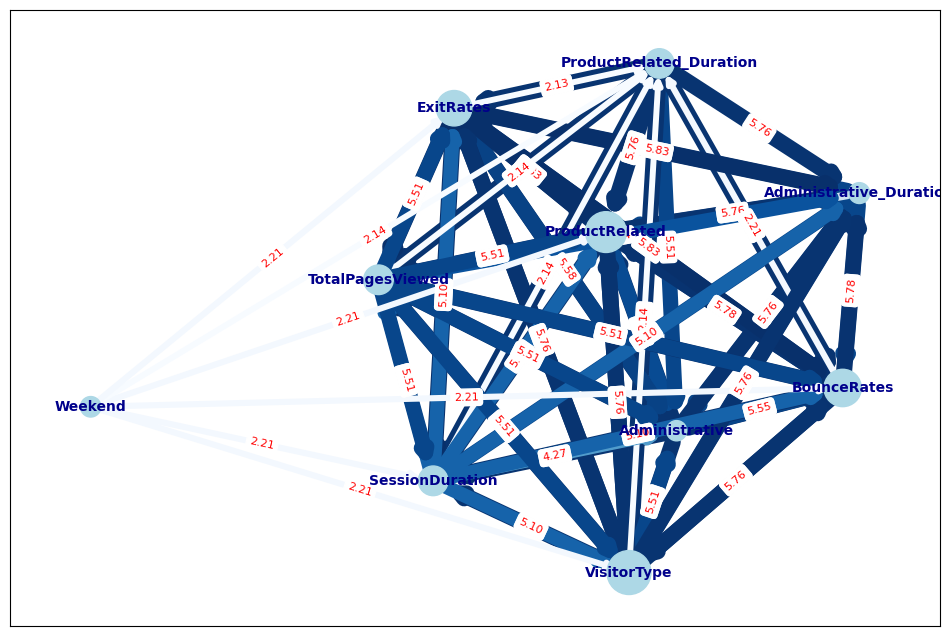

In [126]:

# Filter rules for high confidence and lift
filtered_rules = rules[(rules['lift'] > 2.0) & (rules['confidence'] > 0.8)]

# Initialize graph
G = nx.DiGraph()

# Add nodes and edges
for _, row in filtered_rules.iterrows():
    for antecedent in row['antecedents']:
        G.add_node(antecedent, size=frequent_itemsets[frequent_itemsets['itemsets'] == {antecedent}]['support'].values[0])
    for consequent in row['consequents']:
        G.add_node(consequent, size=frequent_itemsets[frequent_itemsets['itemsets'] == {consequent}]['support'].values[0])
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

# Positioning and scaling
pos = nx.spring_layout(G, seed=42)

# Node sizes based on support
node_sizes = [1000 * G.nodes[node]['size'] for node in G.nodes]

# Edge weights based on lift
edge_weights = [G[u][v]['weight'] for u, v in G.edges]

# Draw graph
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=node_sizes)
nx.draw_networkx_edges(G, pos, edge_color=edge_weights, edge_cmap=plt.cm.Blues, width=[w * 2 for w in edge_weights], arrows=True)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='darkblue', font_weight='bold')

# Add edge labels with lift
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='red')

# Add color bar for edge weights
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(edge_weights), vmax=max(edge_weights)))
plt.colorbar(sm, label="Lift")

# Title and show
plt.title("Enhanced Apriori Association Rule Visualization", fontsize=14)
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges with attributes
for rule in rules:
    G.add_node(rule["antecedent"], color="skyblue")
    G.add_node(rule["consequent"], color="lightgreen")
    G.add_edge(
        rule["antecedent"],
        rule["consequent"],
        weight=rule["lift"],
        confidence=rule["confidence"],
    )

# Position nodes using a layout
pos = nx.spring_layout(G)

# Draw nodes
node_colors = [G.nodes[node]["color"] for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800, alpha=0.8)

# Draw edges with widths proportional to lift
edge_weights = [G.edges[edge]["weight"] for edge in G.edges]
nx.draw_networkx_edges(
    G, pos, edge_color="gray", width=[weight for weight in edge_weights]
)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

# Add a title
plt.title("Simple Association Rule Visualization")
plt.show()
